**New York Service Request** <br>
Problem Objective :
Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

Analysis Tasks to be performed:
(Perform a service request data analysis of New York City 311 calls)

Import a 311 NYC service request.
Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘RequestClosingTime’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

Are the type of complaint or service requested and location related?

**Importing the necessary resources**

In [1]:
import pandas as pd
import numpy as np

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loaded the data
data = pd.read_excel("...........NYC311data.xlsx")
data.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


**Data Cleaning**

The steps involved in this area:
1. Converting Created and Closed Date to Date Type
2. Creating new column ‘RequestClosingTime’ as the time elapsed between request creation and request closing
3. Removing whitespaces from the column names


In [3]:
#Check the shape of the dataset
data.shape

(300698, 53)

In [4]:
data.describe(include = 'all')

C:\Users\hp\AppData\Local\Temp\ipykernel_13108\4280773600.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = 'all')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
count,300698.00,300698,298534,300698,300698,300698,294784,300567,298083.0,256288,...,243,243,213,213,0.0,1,2,297158.000000,297158.000000,297158
unique,NaN,259493,237165,1,3,24,45,18,NaN,107652,...,29,34,2,160,NaN,1,2,NaN,NaN,126048
top,NaN,2015-07-11 23:04:00,2015-11-08 07:34:00,NYPD,New York City Police Department,Blocked Driveway,Loud Music/Party,Street/Sidewalk,NaN,1207 BEACH AVENUE,...,FDR Dr,East/Queens Bound,Roadway,East 96th St (Exit 14) - Triborough Br (Exit 17),NaN,Manhattan Bound,St. George Terminal (Staten Island),NaN,NaN,"(40.83036235589997, -73.86602154214397)"
freq,NaN,9,24,300698,300690,77044,61430,249299,NaN,904,...,33,21,162,6,NaN,1,1,NaN,NaN,902
first,NaN,2015-03-29 00:33:01,2015-03-29 00:57:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,30279480.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937,NaN
25%,30801181.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10310.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142,NaN
50%,31304364.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11208.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781,NaN
75%,31784464.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11238.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805,NaN


In [5]:
#Figuring out how much of the data is missing
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

#Aggregating the total missing data and the percentage that is missing
missing_data = pd.concat([total,percent],axis =1 , keys=['Total','Percent'])
missing_data.head(15)

,Total,Percent
School or Citywide Complaint,300698,1.000000
Vehicle Type,300698,1.000000
Taxi Company Borough,300698,1.000000
Taxi Pick Up Location,300698,1.000000
Garage Lot Name,300698,1.000000
...,...,...
Bridge Highway Direction,300455,0.999192
Landmark,300349,0.998839
Intersection Street 2,257336,0.855796
Intersection Street 1,256840,0.854146


Converting Created and Closed Date to Date Type

In [6]:
#Checking data types
data.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [7]:
#Removing whitespaces
data = data.rename(columns=lambda x: x.replace(' ', ''))
data.columns

Index(['UniqueKey', 'CreatedDate', 'ClosedDate', 'Agency', 'AgencyName',
       'ComplaintType', 'Descriptor', 'LocationType', 'IncidentZip',
       'IncidentAddress', 'StreetName', 'CrossStreet1', 'CrossStreet2',
       'IntersectionStreet1', 'IntersectionStreet2', 'AddressType', 'City',
       'Landmark', 'FacilityType', 'Status', 'DueDate',
       'ResolutionDescription', 'ResolutionActionUpdatedDate',
       'CommunityBoard', 'Borough', 'XCoordinate(StatePlane)',
       'YCoordinate(StatePlane)', 'ParkFacilityName', 'ParkBorough',
       'SchoolName', 'SchoolNumber', 'SchoolRegion', 'SchoolCode',
       'SchoolPhoneNumber', 'SchoolAddress', 'SchoolCity', 'SchoolState',
       'SchoolZip', 'SchoolNotFound', 'SchoolorCitywideComplaint',
       'VehicleType', 'TaxiCompanyBorough', 'TaxiPickUpLocation',
       'BridgeHighwayName', 'BridgeHighwayDirection', 'RoadRamp',
       'BridgeHighwaySegment', 'GarageLotName', 'FerryDirection',
       'FerryTerminalName', 'Latitude', 'Longitude', 

In [8]:
# convert the columns to datetime format using apply() and pd.to_datetime()
data[['CreatedDate', 'ClosedDate']] = data[['CreatedDate', 'ClosedDate']].apply(pd.to_datetime)

#Create new column 'RequestClosingTime'
data['RequestClosingTime'] = data['ClosedDate'] - data['CreatedDate']

#Check the data types
data.dtypes


UniqueKey                                int64
CreatedDate                     datetime64[ns]
ClosedDate                      datetime64[ns]
Agency                                  object
AgencyName                              object
ComplaintType                           object
Descriptor                              object
LocationType                            object
IncidentZip                            float64
IncidentAddress                         object
StreetName                              object
CrossStreet1                            object
CrossStreet2                            object
IntersectionStreet1                     object
IntersectionStreet2                     object
AddressType                             object
City                                    object
Landmark                                object
FacilityType                            object
Status                                  object
DueDate                         datetime64[ns]
ResolutionDes

**Exploratory Data Analysis**<br>
The following plots will be made:<br>
1.Geographical distribution of the service requests across New York - to find out which area is the most affected<br>
2.Frequency Distribution of complaint types - to find out which complaint types are the most common<br>
3.Word cloud on the description - comparing whether the complaint type and the description matches and also get a sense of what peoples complaints are specifically about<br>
4. Frequency distribution per day - is there a specific day we need to beef up personell<br>



**1. Geographical Distribution of the service request across New York**

In [9]:
import IPython

from IPython.display import HTML

embed_code = "<div class='tableauPlaceholder' id='viz1678431774396' style='position: relative'><noscript><a href='#'><img alt='Service request distribution across New York ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;NY&#47;NYC311ServicerequestdistributionacrossNewYork&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='NYC311ServicerequestdistributionacrossNewYork&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;NY&#47;NYC311ServicerequestdistributionacrossNewYork&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678431774396');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.95)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"

HTML(embed_code)

#The darker the shade of the bubble the higher the number of cases reported
#Most of the service requests come from New York City

**2. Complaint type analysis**

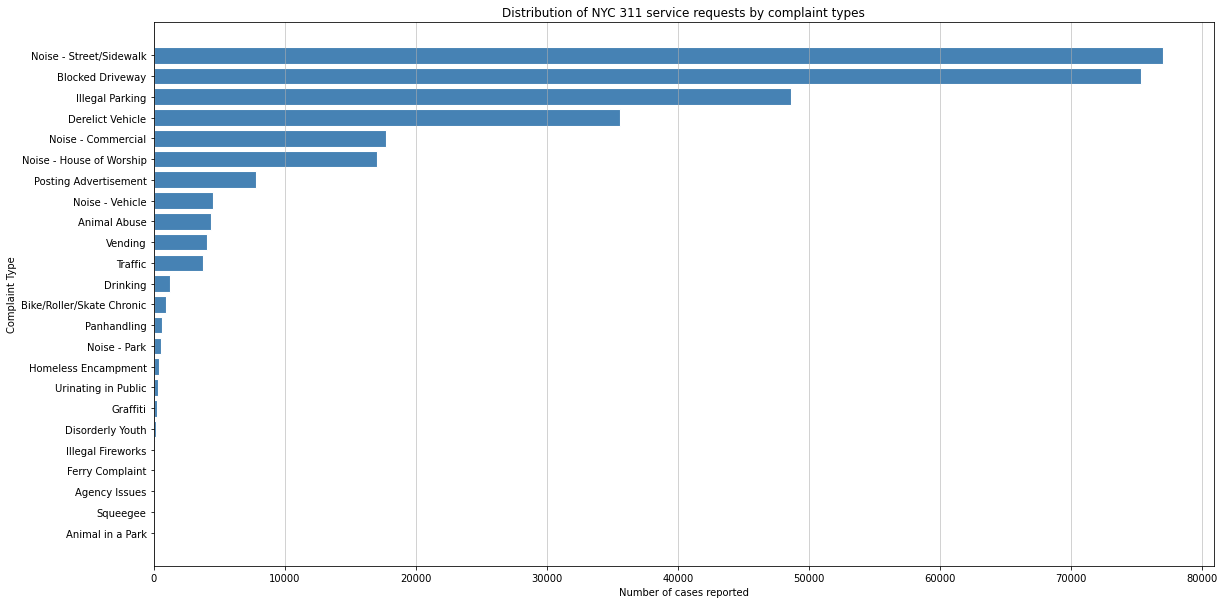

In [10]:

#Plotting the frequency distribution of the complaint type
#Set the labels
labels = data['ComplaintType'].unique()
values = data['ComplaintType'].value_counts()


#Creating the bar
fig, ax = plt.subplots(figsize=([19,10]))
ax.barh(labels,values, color = 'steelblue',edgecolor='white', linewidth = 1.1)
ax.invert_yaxis()
ax.set_xlabel('Number of cases reported')
ax.set_ylabel('Complaint Type')
ax.set_title('Distribution of NYC 311 service requests by complaint types')
ax.grid(axis = 'x', linestyle= "-", alpha = 0.7)


#Plotting the bar
plt.show()


#The top 3 complaints are the Noise on sidewalks and streets, blocked driveway and illegal parking
#Interestingly enough the top 5 service requests involve either noise or a vehicle obstruction. 



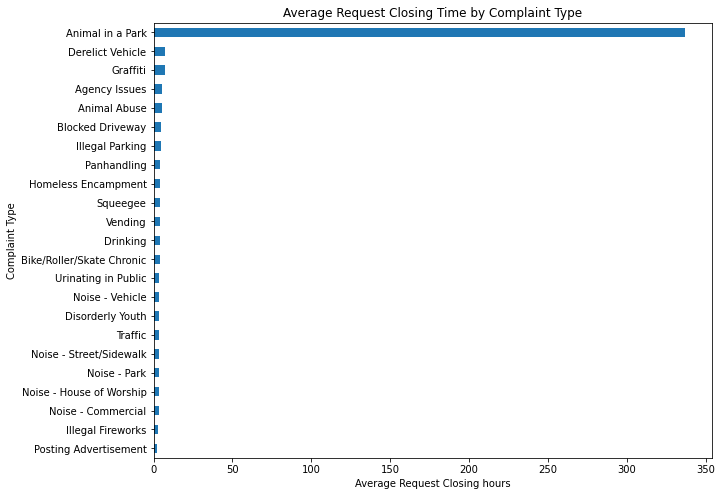

In [11]:
#plotting the average request closing time by complaint type

#Converting the column to hours 
avg_closing_time = data[data['RequestClosingTime'] > pd.Timedelta(0)].groupby('ComplaintType')['RequestClosingTime'].mean().sort_values() / pd.Timedelta(hours=1)
# the `pd.Timedelta(hours=1)` converts the time delta to hours
# the `groupby` method groups the data by `ComplaintType` and calculates the mean of `RequestClosingTime` for each group

# create the bar plot
fig, ax = plt.subplots(figsize=(10, 8))
avg_closing_time.plot(kind='barh', ax=ax)

# set the axis labels and title
ax.set_xlabel('Average Request Closing hours')
ax.set_ylabel('Complaint Type')
ax.set_title('Average Request Closing Time by Complaint Type')

plt.show()


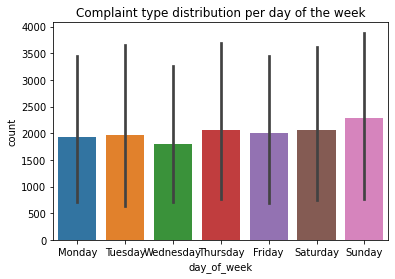

In [12]:
##Plotting the complaint type distribution per day
##Extract the days from the data['CreatedDate']
data['day_of_week'] = data['CreatedDate'].dt.day_name()

##Count the number of complaints for each day and type
complaint_counts = data.groupby(['day_of_week','ComplaintType']).size().reset_index(name='count')

#Define the order of the days of the week
day_order =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


#Plot the bar graph and specify the order
sns.barplot(data = complaint_counts, x ='day_of_week',y='count',order=day_order).set(title = "Complaint type distribution per day of the week")
plt.show()

**3. Word cloud on the description**

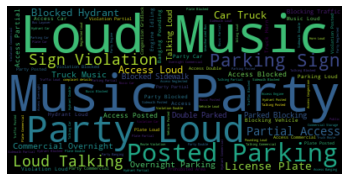

In [13]:
##Word cloud on the descrption to find the most used word
from wordcloud import WordCloud

#replace empty values with an empty string
data['Descriptor'].fillna('',inplace=True)

#concatenate all text in the column into a string
text = ' '.join(data['Descriptor'].tolist())

#Create a wordcloud
wordcloud = WordCloud().generate(text)

#plot the cloud
plt.imshow(wordcloud,interpolation= 'bilinear')
plt.axis('off')
plt.show()
